In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Создать директорию для сохранения новых изображений
output_dir = '/content/drive/My Drive/dataset1_augmented/'
os.makedirs(output_dir, exist_ok=True)

# Аугментация
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]  # Добавлено изменение яркости
)

# Увеличение данных для каждой категории
categories = ['canteen', 'library', 'open space']
for category in categories:
    input_path = os.path.join(train_dir, category)
    output_path = os.path.join(output_dir, category)
    os.makedirs(output_path, exist_ok=True)

    images = os.listdir(input_path)
    for img_name in images:
        img_path = os.path.join(input_path, img_name)
        img = load_img(img_path)  # Загрузить изображение
        x = img_to_array(img)  # Преобразовать в массив
        x = x.reshape((1,) + x.shape)  # Преобразовать в форму (1, height, width, channels)

        # Генерация новых изображений
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_path, save_prefix=category, save_format='jpeg'):
            i += 1
            if i >= 5:  # Количество новых изображений на 1 оригинал (настраиваемо)
                break


In [3]:
train_dir = '/content/drive/My Drive/dataset1/training'

val_dir = '/content/drive/My Drive/dataset1/validation'


In [5]:
train_dir = '/content/drive/My Drive/dataset1_augmented'

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Аугментация для тренировочного набора
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,  # Поворот изображений
    width_shift_range=0.2,  # Горизонтальный сдвиг
    height_shift_range=0.2,  # Вертикальный сдвиг
    shear_range=0.2,  # Сдвиг по углам
    zoom_range=0.2,  # Зум
    horizontal_flip=True,  # Отражение по горизонтали
    fill_mode='nearest'  # Заполнение пустых пикселей
)

# Для валидации только нормализация (аугментация не нужна)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Генераторы данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 740 images belonging to 3 classes.
Found 151 images belonging to 3 classes.


In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes: canteen, library, open space
])


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.5246 - loss: 0.9961 - val_accuracy: 0.5364 - val_loss: 1.2122
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9227 - loss: 0.2793 - val_accuracy: 0.5894 - val_loss: 0.9225
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 996ms/step - accuracy: 0.9756 - loss: 0.1634 - val_accuracy: 0.6556 - val_loss: 0.7936
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 924ms/step - accuracy: 0.9618 - loss: 0.1299 - val_accuracy: 0.6623 - val_loss: 0.7498
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9828 - loss: 0.0930 - val_accuracy: 0.6424 - val_loss: 0.7834
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 951ms/step - accuracy: 0.9759 - loss: 0.0833 - val_accuracy: 0.7417 - val_loss: 0.6259
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 965ms/step - accuracy: 0.9781 - loss: 0.0678 - val_accuracy: 0.7682 - val_loss: 0.6178
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1000ms/step - accuracy: 0.9913 - loss: 0.0514 - val_accuracy: 0.7417 - val

In [16]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNetV2  # Используем MobileNetV2 как пример

# Загрузка базовой модели (MobileNetV2) без последнего слоя
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Заморозим веса базовой модели
base_model.trainable = False

# Создаем улучшенную модель
enhanced_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Сглаживание выхода
    layers.BatchNormalization(),  # Добавление нормализации
    layers.Dropout(0.3),  # Dropout для предотвращения переобучения
    layers.Dense(128, activation='relu'),  # Дополнительный полносвязный слой
    layers.BatchNormalization(),  # Нормализация
    layers.Dropout(0.3),  # Dropout
    layers.Dense(3, activation='softmax')  # Последний слой с количеством классов
])

# Компиляция модели
enhanced_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение модели
history_enhanced = enhanced_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7384 - loss: 0.6780 - val_accuracy: 0.5563 - val_loss: 0.8567
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 72s 981ms/step - accuracy: 0.9617 - loss: 0.0999 - val_accuracy: 0.6821 - val_loss: 0.6161
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9578 - loss: 0.1071 - val_accuracy: 0.6755 - val_loss: 0.7556
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9684 - loss: 0.1086 - val_accuracy: 0.7417 - val_loss: 0.6051
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 881ms/step - accuracy: 0.9654 - loss: 0.0850 - val_accuracy: 0.7815 - val_loss: 0.4628
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9867 - loss: 0.0331 - val_accuracy: 0.8146 - val_loss: 0.4101
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9790 - loss: 0.0497 - val_accuracy: 0.8013 - val_loss: 0.4452
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 970ms/step - accuracy: 0.9920 - loss: 0.0346 - val_accuracy: 0.7616 - 

In [17]:
import tensorflow as tf
# Разморозка последних слоев базовой модели
base_model.trainable = True
for layer in base_model.layers[:-30]:  # Замораживаем все, кроме последних 30 слоев
    layer.trainable = False

# Компиляция модели с меньшим learning rate
enhanced_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Меньший шаг
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Дальнейшее обучение модели
history_enhanced_finetune = enhanced_model.fit(
    train_generator,
    epochs=10,  # Обучение еще 5 эпох
    validation_data=val_generator
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9770 - loss: 0.0636 - val_accuracy: 0.7748 - val_loss: 0.6562
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9879 - loss: 0.0401 - val_accuracy: 0.8079 - val_loss: 0.5945
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 869ms/step - accuracy: 0.9974 - loss: 0.0211 - val_accuracy: 0.7947 - val_loss: 0.5813
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 972ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 0.8543 - val_loss: 0.4392
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 954ms/step - accuracy: 0.9939 - loss: 0.0150 - val_accuracy: 0.8411 - val_loss: 0.5535
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 952ms/step - accuracy: 0.9988 - loss: 0.0155 - val_accuracy: 0.8344 - val_loss: 0.6228
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9930 - loss: 0.0146 - val_accuracy: 0.8543 - val_loss: 0.5252
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 995ms/step - accuracy: 0.9976 - loss: 0.0096 - val_accuracy: 0.8

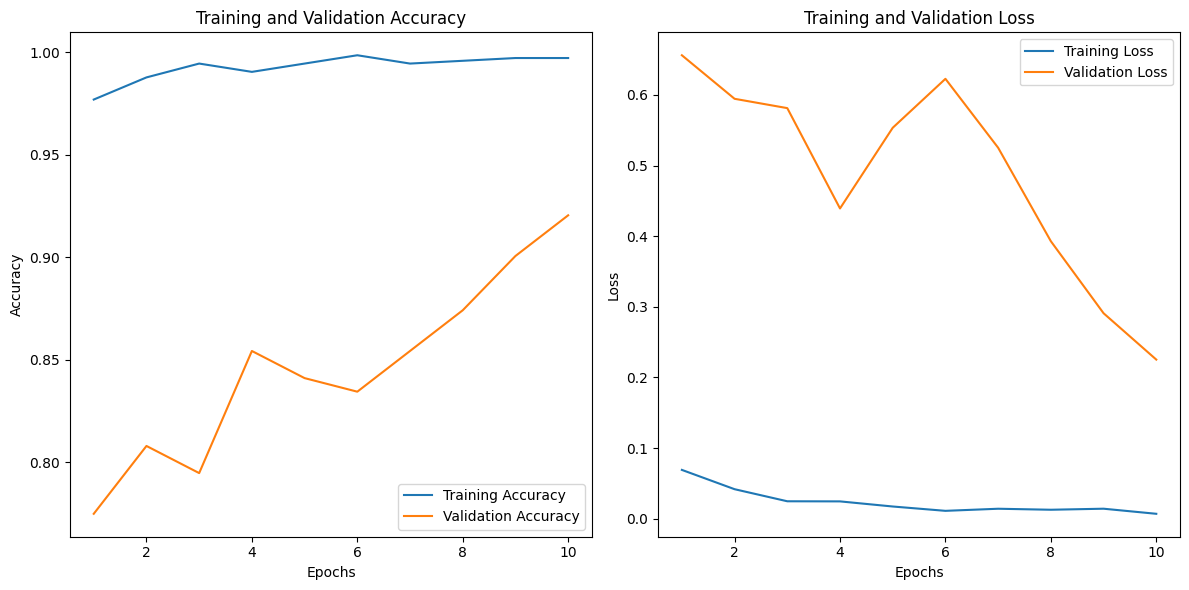

In [18]:
import matplotlib.pyplot as plt

# Функция для построения графиков
def plot_training_history(history):
    # Достаем данные из истории обучения
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Количество эпох
    epochs = range(1, len(acc) + 1)

    # Построение графика точности
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Построение графика потерь
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Показать графики
    plt.tight_layout()
    plt.show()

# Вызов функции для отображения истории обучения
plot_training_history(history_enhanced_finetune)
